In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('output2.csv',usecols=[1]).clip(0)
df = df.iloc[:8000,:]
df.head()

,Plasma_current
0,0.0000
1,1.3591
2,5.7585
3,11.6940
4,17.8730


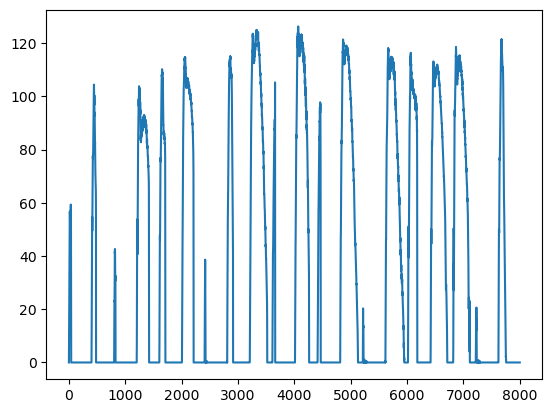

In [3]:
plt.plot(df['Plasma_current'])

In [4]:
from statsmodels.tsa.stattools import adfuller

In [5]:
adf, pvalue , usedlag_ , nobs_ , critical_values_ , icbest = adfuller(df)

In [6]:
pvalue

3.580393002596992e-08

In [7]:
df.index.name='X'

In [8]:
df.head()

,Plasma_current
X,
0,0.0000
1,1.3591
2,5.7585
3,11.6940
4,17.8730


In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [12]:
decomposed = seasonal_decompose(df['Plasma_current'],model='additive', extrapolate_trend='freq', period=2)

In [13]:
trend = decomposed.trend
seasonal  = decomposed.seasonal
residual = decomposed.resid

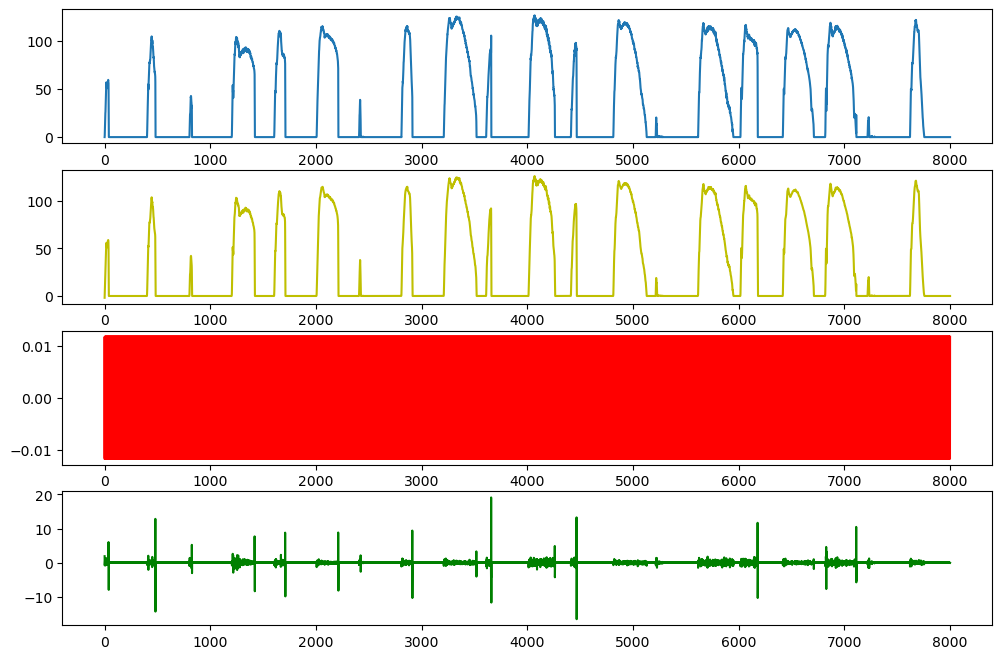

In [25]:

plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df['Plasma_current'])
plt.subplot(412)
plt.plot(trend, color='y')
plt.subplot(413)
plt.plot(seasonal, color='r')
plt.subplot(414)
plt.plot(residual, color='g')
